# Data Cleaning Exercise

Cleaning your data is crucial when starting a new data engineering project because it ensures the accuracy, consistency, and reliability of the dataset. Dirty data, which may include duplicates, missing values, and errors, can lead to incorrect analysis and insights, ultimately affecting the decision-making process. Data cleaning helps in identifying and rectifying these issues, providing a solid foundation for building effective data models and analytics. Additionally, clean data improves the performance of algorithms and enhances the overall efficiency of the project, leading to more trustworthy and actionable results.

Use Python, ```numpy```, ```pandas``` and/or ```matplotlib``` to analyse and clean your batch data:

## Import Libraries

In [1]:
# TODO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Data

In [2]:
#
df = pd.read_csv('lastfm_tracks.csv')

## Understand the Data

View the first few rows, get summary statistics and check data types

In [3]:
# TODO

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Track      100 non-null    object
 1   Artist     100 non-null    object
 2   Listeners  100 non-null    int64 
 3   URL        100 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.3+ KB


,Track,Artist,Listeners,URL
0,"Good Luck, Babe!",Chappell Roan,1683677,https://www.last.fm/music/Chappell+Roan/_/Good...
1,BIRDS OF A FEATHER,Billie Eilish,1785566,https://www.last.fm/music/Billie+Eilish/_/BIRD...
2,Party 4 U,Charli XCX,767993,https://www.last.fm/music/Charli+XCX/_/Party+4+U
3,See You Again (feat. Kali Uchis),"Tyler, the Creator",2112467,"https://www.last.fm/music/Tyler,+the+Creator/_..."
4,back to friends,Sombr,556017,https://www.last.fm/music/Sombr/_/back+to+friends


## Handle Missing Data

Identify missing values and fill or drop missing values

In [4]:
# TODO

missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

df = df.dropna()

print("Remaining missing values:\n", df.isnull().sum())

Missing values per column:
 Track        0
Artist       0
Listeners    0
URL          0
dtype: int64
Remaining missing values:
 Track        0
Artist       0
Listeners    0
URL          0
dtype: int64


## Handle Duplicates

Identify duplicates and remove them

In [6]:
# TODO

duplicates = df.duplicated(subset=['Track', 'Artist'], keep=False)
print("Number of duplicates:", duplicates.sum())

display(df[duplicates].head())

df = df.drop_duplicates(subset=['Track', 'Artist'], keep='first')
print("Number of rows after removing duplicates:", len(df))



Number of duplicates: 0


,Track,Artist,Listeners,URL


Number of rows after removing duplicates: 100


## Handle Outliers

Identify outliers and remove or corret them

In [9]:
# TODO

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

df = remove_outliers_iqr(df, 'Listeners')

print("Anzahl der Zeilen nach Entfernung von Ausreißern:", len(df))


Anzahl der Zeilen nach Entfernung von Ausreißern: 99


## Handle Incorrect Data Types

In [10]:
# TODO

df['release_date'] = pd.to_datetime('2023', format='%Y')
print(df.dtypes)



Track                   object
Artist                  object
Listeners                int64
URL                     object
release_date    datetime64[ns]
dtype: object


## Visualize Data

Use graphes, plots and/or diagrams to visualize the data

C:\Users\pinar\AppData\Local\Temp\ipykernel_21512\1071767331.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Listeners', y='Track', data=top10, palette='mako')
C:\Users\pinar\AppData\Local\Temp\ipykernel_21512\1071767331.py:11: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\pinar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127911 (\N{HEADPHONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


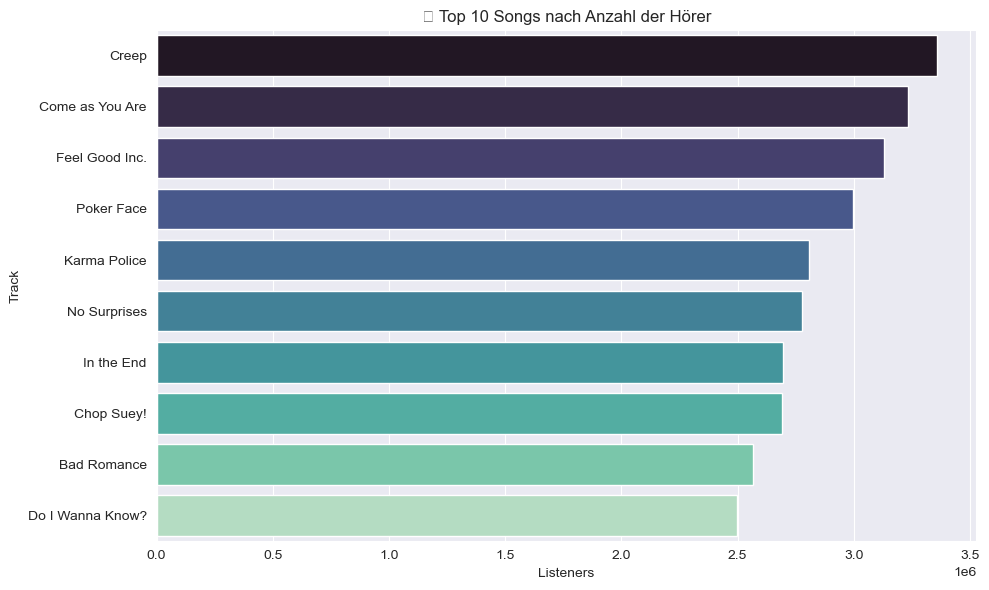

C:\Users\pinar\AppData\Local\Temp\ipykernel_21512\1071767331.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='cool')
C:\Users\pinar\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127908 (\N{MICROPHONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


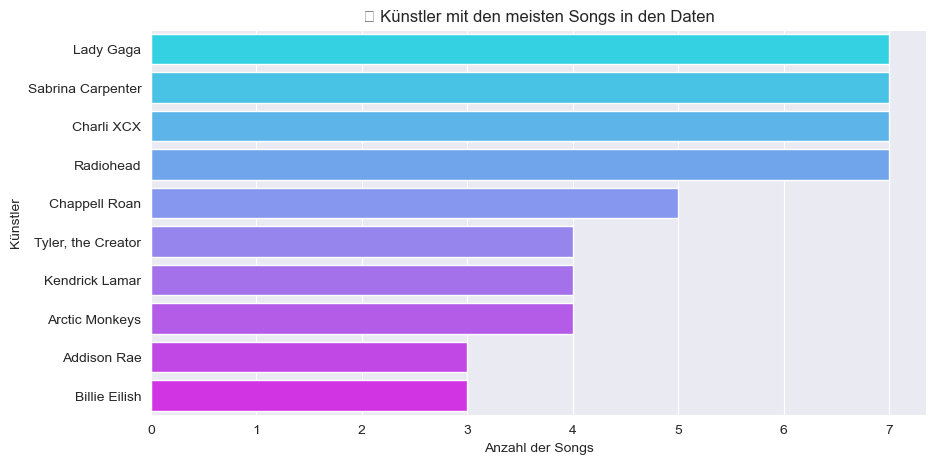

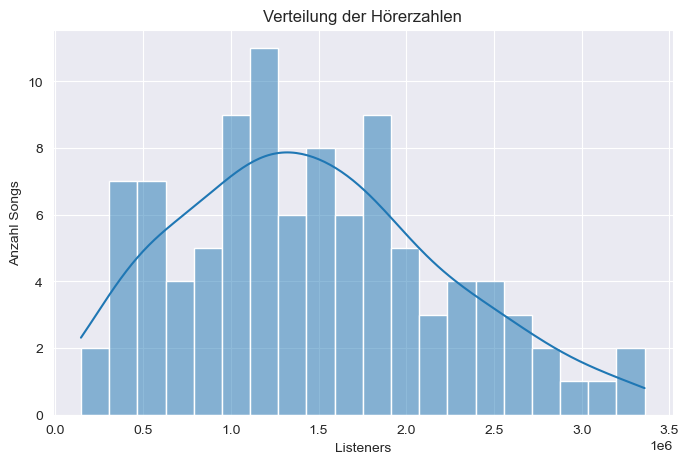

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

top10 = df.sort_values(by='Listeners', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x='Listeners', y='Track', data=top10, palette='mako')
plt.title("🎧 Top 10 Songs nach Anzahl der Hörer")
plt.xlabel("Listeners")
plt.ylabel("Track")
plt.tight_layout()
plt.show()


top_artists = df['Artist'].value_counts().nlargest(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='cool')
plt.title("🎤 Künstler mit den meisten Songs in den Daten")
plt.xlabel("Anzahl der Songs")
plt.ylabel("Künstler")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(df['Listeners'], bins=20, kde=True)
plt.title("Verteilung der Hörerzahlen")
plt.xlabel("Listeners")
plt.ylabel("Anzahl Songs")
plt.show()


## Save Cleaned Data

In [13]:
# TODO

df.to_csv('api_cleaned.csv', index=False)
print("Cleaned data saved to 'api_cleaned.csv'")


Cleaned data saved to 'api_cleaned.csv'
